In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
frame=pd.read_csv(r'C:\Users\Manas\Desktop\machine\project\fake_or_real_news.csv')
frame.shape

(6335, 4)

In [3]:
frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
y=frame.label

In [5]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
frame.drop("label",axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ..."
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o..."
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...


In [7]:
frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
X_train,X_test,y_train,y_test=train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [9]:
X_train.head()

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [10]:
X_test.head()

4221    Donald Trump threatened to sue the New York Ti...
1685    Planned Parenthood: Abortion pill usage now ri...
3348    In a last dash, final "hail mary" attempt to e...
2633    Washington (CNN) Donald Trump and Ben Carson n...
975     The Obama administration announced Friday it w...
Name: text, dtype: object

In [11]:
y_train.head()

2576    FAKE
1539    FAKE
5163    REAL
2615    FAKE
4270    FAKE
Name: label, dtype: object

In [12]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train= count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [13]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [14]:
print(count_train)

  (1, 36831)	1
  (1, 47506)	1
  (1, 38823)	1
  (1, 25684)	1
  (1, 21568)	1
  (1, 36087)	1
  (1, 16814)	1
  (1, 49203)	2
  (1, 25686)	1
  (1, 15927)	2
  (1, 29531)	2
  (1, 8399)	1
  (1, 42534)	1
  (1, 21881)	1
  (1, 35256)	1
  (1, 35783)	4
  (1, 51896)	2
  (1, 44520)	2
  (1, 15924)	2
  (1, 50628)	1
  (1, 54177)	1
  (1, 12105)	1
  (1, 42470)	1
  (2, 9445)	1
  (2, 8779)	1
  :	:
  (4243, 30464)	1
  (4243, 35836)	2
  (4243, 48084)	2
  (4243, 22146)	1
  (4243, 9042)	2
  (4243, 35190)	2
  (4243, 52934)	1
  (4243, 35037)	1
  (4243, 55388)	2
  (4243, 43875)	1
  (4243, 43172)	1
  (4243, 3441)	1
  (4243, 35035)	1
  (4243, 11982)	2
  (4243, 39633)	4
  (4243, 22069)	1
  (4243, 7184)	1
  (4243, 14871)	1
  (4243, 41311)	1
  (4243, 50690)	1
  (4243, 27842)	1
  (4243, 37695)	1
  (4243, 38823)	1
  (4243, 51896)	6
  (4243, 50628)	1


In [32]:
print(count_test)

  (0, 2385)	1
  (0, 3184)	1
  (0, 4067)	1
  (0, 4919)	1
  (0, 5460)	2
  (0, 7383)	1
  (0, 7422)	1
  (0, 7464)	1
  (0, 10525)	1
  (0, 10673)	2
  (0, 10984)	1
  (0, 10985)	2
  (0, 12457)	1
  (0, 12601)	1
  (0, 13343)	1
  (0, 14163)	1
  (0, 14446)	1
  (0, 14867)	1
  (0, 15085)	1
  (0, 15285)	1
  (0, 15812)	1
  (0, 15870)	1
  (0, 15942)	2
  (0, 16027)	4
  (0, 16580)	1
  :	:
  (2090, 52119)	1
  (2090, 52134)	2
  (2090, 52193)	3
  (2090, 52290)	1
  (2090, 52661)	1
  (2090, 52926)	2
  (2090, 52948)	1
  (2090, 53308)	1
  (2090, 53607)	1
  (2090, 53792)	4
  (2090, 54120)	1
  (2090, 54171)	1
  (2090, 54393)	2
  (2090, 54647)	5
  (2090, 54699)	1
  (2090, 54746)	1
  (2090, 54822)	3
  (2090, 54850)	1
  (2090, 54936)	2
  (2090, 55614)	1
  (2090, 55764)	2
  (2090, 55773)	1
  (2090, 55858)	1
  (2090, 56196)	1
  (2090, 56512)	1


In [36]:
print(tfidf_train)

  (1, 42470)	0.07711040274149526
  (1, 12105)	0.15008066461476866
  (1, 54177)	0.13782629144711137
  (1, 50628)	0.061296988343109586
  (1, 15924)	0.3479045460649079
  (1, 44520)	0.4973826512693341
  (1, 51896)	0.11596517664605868
  (1, 35783)	0.30902690818827977
  (1, 35256)	0.12628385718450857
  (1, 21881)	0.21271688045815978
  (1, 42534)	0.06081715886809217
  (1, 8399)	0.08729542880625335
  (1, 29531)	0.1454406205718245
  (1, 15927)	0.4973826512693341
  (1, 25686)	0.13550453594288983
  (1, 49203)	0.1672740861784377
  (1, 16814)	0.10404977746548139
  (1, 36087)	0.12648679854389897
  (1, 21568)	0.1007920919566398
  (1, 25684)	0.1030420922189754
  (1, 38823)	0.06048803110658644
  (1, 47506)	0.14539060877460044
  (1, 36831)	0.10772488937433067
  (2, 16972)	0.1606296088662543
  (2, 762)	0.48803966069171073
  :	:
  (4243, 41435)	0.02969665315895183
  (4243, 53607)	0.044665186536595916
  (4243, 659)	0.04293180970016178
  (4243, 38834)	0.037049324915825195
  (4243, 19003)	0.03443753105034290

In [37]:
print(tfidf_test)

  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

In [15]:
print(tfidf_vectorizer.get_feature_names()[-8:])

['عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [16]:
print(count_vectorizer.get_feature_names()[0:8])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt']


In [17]:
count_df=pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df=pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference=set(count_df.columns)-set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))


False


In [18]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy 0.857
Confusion matrix, without normalization


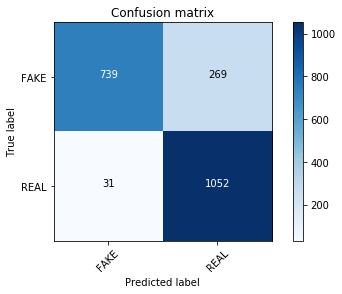

In [21]:
clf=MultinomialNB()
clf.fit(tfidf_train,y_train)
pred=clf.predict(tfidf_test)
score=accuracy_score(y_test,pred)
print("Accuracy %0.3f" %score)
confusion_m=confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
plot_confusion_matrix(confusion_m,classes=['FAKE','REAL'])


Accuracy 0.893
Confusion matrix, without normalization


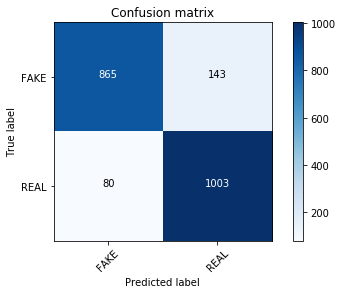

In [22]:
clf=MultinomialNB()
clf.fit(count_train,y_train)
pred=clf.predict(count_test)
score=accuracy_score(y_test,pred)
print("Accuracy %0.3f" %score)
confusion_m=confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
plot_confusion_matrix(confusion_m,classes=['FAKE','REAL'])

accuracy:   0.936
Confusion matrix, without normalization


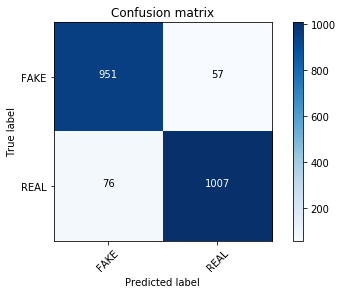

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50, tol=0.21)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
print("accuracy %0.3f" %(100*score)+ "%")

accuracy 93.639%
